In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [4]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# WHO ARE THE PASSENGER IN THE TITANIC?

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

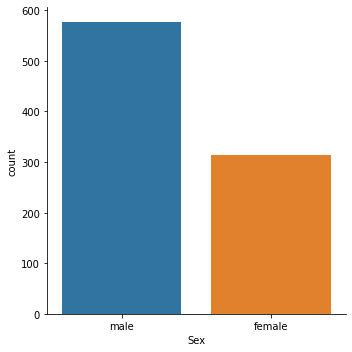

In [54]:

sns.catplot(x= 'Sex', data = titanic_df , kind="count" )

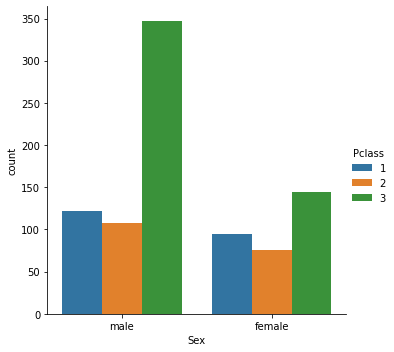

In [57]:
sns.catplot(x= 'Sex', data = titanic_df , hue= 'Pclass' , kind="count" )

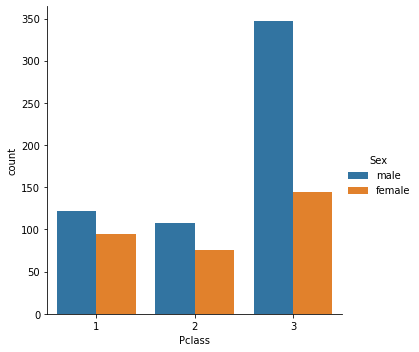

In [58]:
sns.catplot(x= 'Pclass', data = titanic_df , hue= 'Sex' , kind="count" )

In [65]:
def male_female_child (passenger):
    age, sex = passenger
    if age < 16:
            return 'child'
    else:
        return sex

In [66]:
titanic_df['person']=titanic_df[['Age','Sex']].apply(male_female_child,axis = 1)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,count,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,child


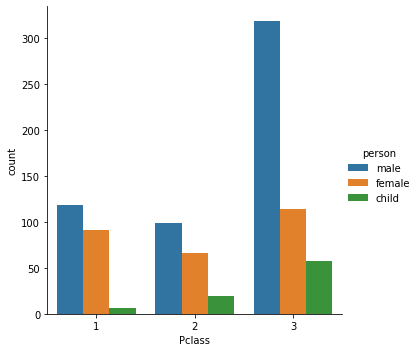

In [67]:
sns.catplot(x= 'Pclass', data = titanic_df , hue= 'person' , kind="count" )

<AxesSubplot:>

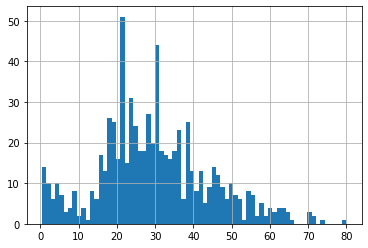

In [68]:
titanic_df['Age'].hist(bins=70)

In [69]:
titanic_df['Age'].mean()

29.69911764705882

In [70]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

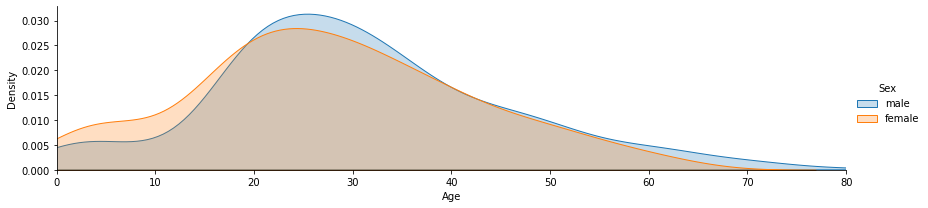

In [74]:
fig = sns.FacetGrid(titanic_df, hue = 'Sex', aspect=4)
fig.map(sns.kdeplot,'Age', shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

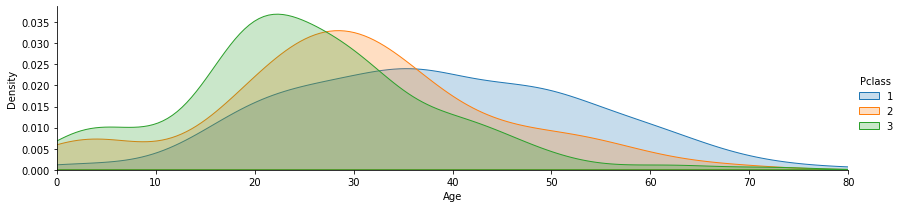

In [75]:
fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect=4)
fig.map(sns.kdeplot,'Age', shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

In [77]:
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

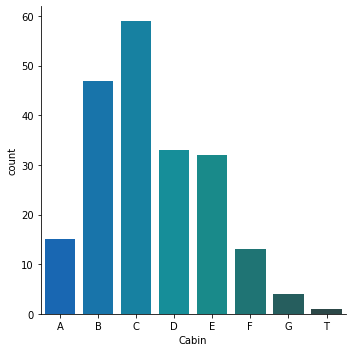

In [98]:
levels =[]

for level in deck :
    levels.append(level[0])
    
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

 
cabin_dff= cabin_df.sort_values(by ='Cabin')

sns.catplot(x = 'Cabin', data = cabin_dff, palette = 'winter_d', kind="count")

 
 

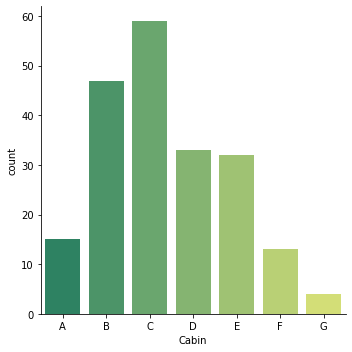

In [100]:
cabin_dff = cabin_dff[cabin_dff.Cabin != 'T']

sns.catplot(x = 'Cabin', data = cabin_dff, palette = 'summer', kind="count")

# Where the passager came from?

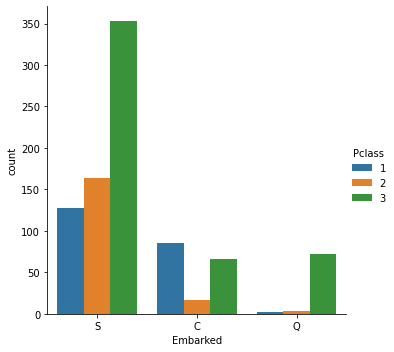

In [105]:
sns.catplot(x = 'Embarked', data = titanic_df ,hue ='Pclass' , kind="count")

# Who is alone and who was with family?

In [107]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,count,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,male


In [108]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [109]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = " With Family "
titanic_df['Alone'].loc[titanic_df['Alone']==0] = " Alone"

C:\Users\davalvar\AppData\Local\Temp\ipykernel_8540\983414543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df['Alone']>0] = " With Family "


In [110]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,count,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,male,Alone


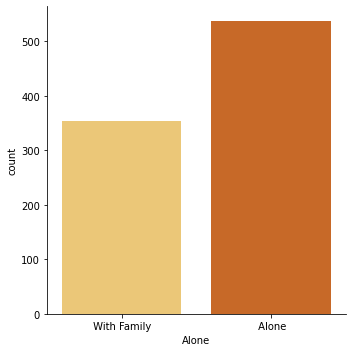

In [111]:
sns.catplot(x = 'Alone', data = titanic_df , palette = 'YlOrBr' , kind="count")

# How affect your age , the posibilitis for survive?

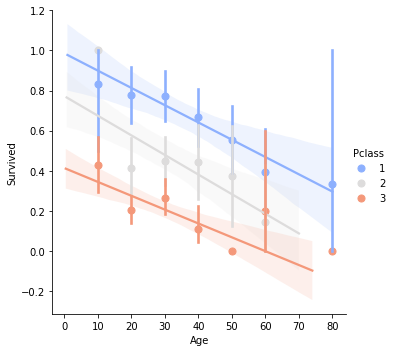

In [126]:
generations =[10, 20, 30, 40, 50, 60, 80]

sns.lmplot(x = 'Age',y= 'Survived', hue='Pclass' , data = titanic_df  , palette = 'coolwarm' , x_bins=generations)

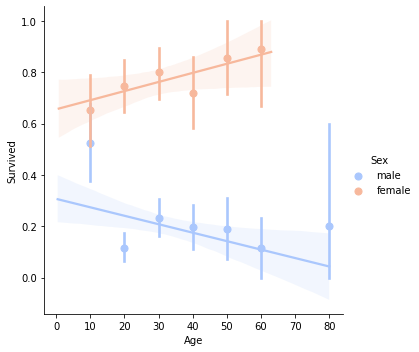

In [128]:
sns.lmplot(x = 'Age',y= 'Survived', hue='Sex' , data = titanic_df  , palette = 'coolwarm' , x_bins=generations)